In [ ]:
import cv2
import glob
import random
import json
import os

import numpy as np

from matplotlib import pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (12,12)

In [ ]:
cnt = [
    [18, 100],
    [57, 68],
    [65, 27],
    [67, 11],
    [8, 30]
]

cnt = np.array(cnt, np.int32)
 
cnt = cnt.reshape((-1, 1, 2))

In [ ]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 1

image = np.zeros((300, 300, 3))

image = cv2.polylines(image, [cnt],
                      True, color, thickness)

plt.imshow(image)

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image,[box],0,(0,0,255),1)

In [ ]:
plt.imshow(image)

In [ ]:
%%time
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)

In [ ]:
filenames = glob.glob('/Users/usmanr/workspace/fisheye_images/rgb_images/*png')

In [ ]:
filenames[0].split('/')[6].replace('.png', '')

In [ ]:
random.shuffle(filenames)

In [ ]:
filenames[0]

In [ ]:
txt_file = open("../input/train.txt", "r")
file_content = txt_file.readlines()

In [ ]:
train = []

with open('../input/train.txt', 'r') as filehandle:
    filecontents = filehandle.readlines()
    for line in filecontents:
        # Remove linebreak which is the last character of the string
        curr_place = line[:-1]
        # Add item to the list
        train.append(curr_place)

In [ ]:
train[:10]

In [ ]:
images_path = '/Users/usmanr/workspace/fisheye_images/rgb_images/'
labels_path = '/Users/usmanr/workspace/fisheye_images/instance_annotations/'

file = train[505]

image = cv2.imread('{0}{1}'.format(images_path, file +'.png'))

with open('{0}{1}'.format(labels_path, file + '.json'), 'r') as f:
    data = json.load(f)


plt.figure(figsize=(15, 15))

for i in range(len(data[file + '.json']['annotation'])):
    if 'person' in data[file + '.json']['annotation'][i]['tags']:
        pts = np.array(data[file + '.json']['annotation'][i]['segmentation'], np.int32)
        pts = pts.reshape((-1, 1, 2))
        #     p rint(pts)
        image = cv2.polylines(image, [pts],
                              True, (0, 0, 255), 4)

plt.imshow(image)

In [ ]:
data

In [ ]:
images_path = '/Users/usmanr/workspace/fisheye_images/rgb_images/'
labels_path = '/Users/usmanr/workspace/fisheye_images/instance_annotations/'

file = train[50]

image = cv2.imread('{0}{1}'.format(images_path, file +'.png'))

with open('{0}{1}'.format(labels_path, file + '.json'), 'r') as f:
    data = json.load(f)


plt.figure(figsize=(15, 15))

for i in range(len(data[file + '.json']['annotation'])):
    if 'construction' in data[file + '.json']['annotation'][i]['tags']:
        pts = np.array(data[file + '.json']['annotation'][i]['segmentation'], np.int32)
        pts = pts.reshape((-1, 1, 2))
        #     p rint(pts)
        image = cv2.polylines(image, [pts],
                              True, (0, 0, 255), 4)

plt.imshow(image)

In [ ]:
with open('/Users/usmanr/fiftyone/coco-2014/train/labels.json', 'r') as f:
    data = json.load(f)

In [ ]:
data['categories']

In [ ]:
data.keys()

In [ ]:
data['images'][0]

In [ ]:
data['images'][0]

In [ ]:
for i in range(len(data['images'])):
    if data['images'][i]['id'] == 96564:
        print(data['images'][i])

In [ ]:
data['annotations'][29262]

In [ ]:
len(data['annotations'])

In [ ]:
images = set()
for i in range(len(data['annotations'])):
    images.add( data['annotations'][i]['image_id'] )
    if data['annotations'][i]['image_id'] == 90216:
        print(i)

In [ ]:
data['annotations'][28190]['segmentation']

In [ ]:
print(data['annotations'][10684]['bbox'])
print(data['annotations'][20890]['bbox'])
print(data['annotations'][25412]['bbox'])
# print(data['annotations'][23563]['bbox'])

In [ ]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000095999.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
i

In [ ]:
# segmentation = data['annotations'][81431]['segmentation'][0]

segmentation = data['annotations'][i]['segmentation']['counts'][1:]

segmentation = np.array(segmentation, np.int32).reshape( len(segmentation) // 2, 2 )

In [ ]:
segmentation.shape

In [ ]:
bbox = [115.74, 433.28, 158.82, 112.55]

bbox = list(map(int, bbox))

In [ ]:
bbox

In [ ]:
bbox = [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]

In [ ]:
bbox

In [ ]:
rect = cv2.minAreaRect(pts2)
box = cv2.boxPoints(rect)

In [ ]:
box

In [ ]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 2
 
pts2 = segmentation.reshape((-1, 1, 2))

# Using cv2.polylines() method
# Draw a Blue polygon with
# thickness of 1 px
image = cv2.polylines(image, [pts2],
                      True, color, thickness)

image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color=(255,100,100), thickness = 2)

rect = cv2.minAreaRect(pts2)
box = cv2.boxPoints(rect)

box = np.int0(box)
cv2.drawContours(image,[box],0,(0,0,255),1)

plt.imshow(image)

In [ ]:
box.reshape(-1)

In [ ]:
def calculate_scale_of_default_boxes(k, m, s_max = 0.95, s_min = 0.05):
    """
    m = number_of_feature_maps
    s_k = s_min + (s_max - s_min) * (k - 1)/(m - 1)
    width_k = s_k * sqrt(aspect_ratio)
    height_k = s_k / sqrt(aspect_ratio)
    """
    return s_min + (s_max - s_min) * (k - 1) / (m - 1)

feature_map_shapes = [38, 19, 10, 5, 3, 1]
number_of_feature_maps = 6

c_x = 150
c_y = 150

# for k, f_k in enumerate(feature_map_shapes):
#     s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps)
#     s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = 6))
#     w = int(s_k * 300)
#     h = int(s_k_prime * 300)
#     print("({0}, {1}), ({2}, {3})".format(c_x - w // 2, c_y - h // 2, c_x + w // 2, c_y + h // 2))
    

In [ ]:
image = np.zeros((300, 300, 3))

feature_map_shapes = [38, 19, 10, 5, 3, 1]
number_of_feature_maps = 6
aspect_ratios = [1/2, 1/3]

for k, f_k in enumerate(feature_map_shapes):
    if k == 1:
        s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps)
        s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = 6))
        w = int(s_k * 300)
        h = int(s_k_prime * 300)
    #     print("({0}, {1}), ({2}, {3})".format(c_x - w // 2, c_y - h // 2, c_x + w // 2, c_y + h // 2))
        print(w, h)

        image = cv2.rectangle(image, (c_x - w // 2, c_y - h // 2), (c_x + w // 2, c_y + h // 2), 
                              color, thickness = 1)

        for ar in aspect_ratios:
            # height, width for numpy
            w = int(s_k*np.sqrt(ar) * 300)
            h = int(s_k/np.sqrt(ar) * 300)
            print(w, h)
            image = cv2.rectangle(image, (c_x - w // 2, c_y - h // 2), (c_x + w // 2, c_y + h // 2), 
                              color, thickness = 1)
        
        w = int(s_k*np.sqrt(ar) * 300)
        h = int(s_k*np.sqrt(ar) * 300)
        print(w, h)
        image = cv2.rectangle(image, (c_x - w // 2, c_y - h // 2), (c_x + w // 2, c_y + h // 2), 
                              color = (255, 100, 100), thickness = 1)


plt.imshow(image)

In [ ]:
images_list = glob.glob('/Users/usmanr/fiftyone/coco-2014/train/data/*jpg')

In [ ]:
images_list[0].split('/')[-1]

In [ ]:
images_dir  = '/Users/usmanr/fiftyone/coco-2014/train/data/*jpg'
labels_files = '/Users/usmanr/fiftyone/coco-2014/train/labels.json'

with open(labels_files, 'r') as f:
    data = json.load(f)

images_list = glob.glob(images_dir)

images_list = [file_name.split('/')[-1] for file_name in images_list]

In [ ]:
def getImageId(data, file_name):
    for i in range(len(data['images'])):
        if data['images'][i]['file_name'] == file_name:
            return data['images'][i]['id']
    return None

def getSegments(data, image_id, desired_category = [1,3,17,18]):

    segments = []

    for i in range(len(data['annotations'])):
        if data['annotations'][i]['image_id'] == image_id and data['annotations'][i]['category_id'] in desired_category:
            pts = data['annotations'][i]['segmentation'][0]

            pts = np.array(pts, np.int32).reshape( len(pts) // 2, 2 )

            pts = pts.reshape((-1, 1, 2))

            rect = cv2.minAreaRect(pts)
            box = cv2.boxPoints(rect)

            segments.append([data['annotations'][i]['category_id']] + list(box.reshape(-1)))

    return segments

for file_name in images_list[:10]:
    # get image_id
    image_id = getImageId(data, file_name)
    
    if image_id is None:
        break
        
    # get segments of interest for image_id
    segments = getSegments(data, image_id)
    
    path = os.path.join('input', file_name.replace('.jpg', '') + '.txt')
    
    print(path)

In [ ]:
segments

In [ ]:
data['images'][90216]

In [1]:
import glob
import json
import numpy as np
import cv2
import os
import argparse

%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
def getImageId(data, file_name):
    for i in range(len(data['images'])):
        if data['images'][i]['file_name'] == file_name:
            return data['images'][i]['id']
    return None

def getSegments(data, image_id, desired_category = [1,3,17,18]):

    segments = []

    for i in range(len(data['annotations'])):
        if data['annotations'][i]['image_id'] == image_id and data['annotations'][i]['category_id'] in desired_category:
            if type(data['annotations'][i]['segmentation']) == list:
                print(data['annotations'][i])
                for pts in data['annotations'][i]['segmentation']:
                    print(pts)
                    pts = np.array(pts, np.int32).reshape( len(pts) // 2, 2 )

                    pts = pts.reshape((-1, 1, 2))

                    rect = cv2.minAreaRect(pts)
                    box = cv2.boxPoints(rect)

                    segments.append([data['annotations'][i]['category_id']] + list(box.reshape(-1)))

#     print(segments)
    return segments

def writeBoxDimensions(images_dir, labels_files):

    with open(labels_files, 'r') as f:
        data = json.load(f)

#     images_list = glob.glob(images_dir)

#     images_list = [file_name.split('/')[-1] for file_name in images_list]

    images_list = ['COCO_train2014_000000099657.jpg']

    for file_name in images_list:
        # get image_id
        image_id = getImageId(data, file_name)
        if image_id is None:
            return 'filename: {0} not found'.format(file_name)
        
        # get segments of interest for image_id
        segments = getSegments(data, image_id)
        
        path = os.path.join('input/train', file_name.replace('.jpg', '') + '.txt')
        
        print(segments)
        break

In [4]:
args = {'image_dir_path': '/Users/usmanr/fiftyone/coco-2014/train/data/*jpg', 
            'label_file_path': '/Users/usmanr/fiftyone/coco-2014/train/labels.json'}

writeBoxDimensions(args['image_dir_path'], args['label_file_path'])

{'segmentation': [[306.51, 58.31, 290.13, 68.92, 277.6, 86.27, 267.96, 104.58, 278.56, 120.0, 288.2, 126.75, 293.98, 126.75, 293.98, 139.28, 285.31, 139.28, 280.49, 146.03, 266.03, 158.56, 245.79, 181.69, 239.04, 206.75, 234.22, 256.87, 245.79, 278.08, 258.32, 303.14, 258.32, 305.07, 279.53, 298.32, 267.96, 333.99, 347.0, 351.34, 359.53, 370.61, 374.95, 370.61, 371.09, 346.52, 390.37, 340.73, 390.37, 314.71, 398.08, 307.96, 389.41, 279.04, 391.34, 273.26, 400.01, 270.37, 398.08, 254.95, 393.26, 239.52, 409.65, 226.99, 414.47, 223.14, 385.55, 159.52, 361.46, 145.06, 337.36, 138.32, 335.43, 125.79, 347.96, 111.33, 352.78, 91.09, 345.07, 73.74, 335.43, 66.03, 326.76, 57.35, 316.15, 54.46]], 'area': 34325.03564999999, 'iscrowd': 0, 'image_id': 99657, 'bbox': [234.22, 54.46, 180.25, 316.15], 'category_id': 1, 'id': 469653}
[306.51, 58.31, 290.13, 68.92, 277.6, 86.27, 267.96, 104.58, 278.56, 120.0, 288.2, 126.75, 293.98, 126.75, 293.98, 139.28, 285.31, 139.28, 280.49, 146.03, 266.03, 158.56,

In [5]:
labels_files = '/Users/usmanr/fiftyone/coco-2014/train/labels.json'
with open(labels_files, 'r') as f:
    data = json.load(f)

In [9]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000006026.txt') as f:
    data = f.readlines()
    
print(data)

['1,-0.17349243,471.9989,2.006134,126.52684,319.17963,128.52795,317.0,474.0\n', '1,-3.9801024e-15,35.0,61.0,35.0,61.0,165.0,0.0,165.0\n', '1,145.99998,416.0,205.85185,237.47632,453.15356,320.38672,393.3017,498.9104\n']


In [10]:
import sys

sys.path.append('../')

from bbox_utils.bbox import rotateRectangle

In [11]:
def calculateSlope(x1, y1, x2, y2):
    print(x1, y1, x2, y2)
    if x1 == x2:
        return 90
    elif y1 == y2:
        return 0
    m = (y1 - y2) / ( x1 - x2 )
    print(m)
    return np.arctan(m) * 180 / np.pi

angle = calculateSlope(-7.7464294,358.64825,300.4485,32.803375)

-7.7464294 358.64825 300.4485 32.803375
-1.0572687734816444


In [12]:
print(rotateRectangle(100, 100, 20, 60, 90))

[131.30063606930844, 104.50224184786953, 122.33916374672503, 122.38217511988069, 68.69936393069156, 95.49775815213047, 77.66083625327497, 77.61782488011931]


In [13]:
(70 + 130 ) / 2

100.0

In [34]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000001011.jpg')

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000001011.txt') as f:
    data = f.readlines()

# image = np.zeros((300, 300, 3))

# data = [
# #         '1,10,10,30,10,30,60,10,60\n', 
# #         '1,142.92893218813452,135.85786437626905,164.14213562373095,157.07106781186548,157.07106781186548,164.14213562373095,135.85786437626905,142.92893218813452\n',
# #         '1,135.85786437626905, 157.07106781186548, 157.07106781186548, 135.85786437626905, 164.14213562373095, 142.92893218813452, 142.92893218813452, 164.14213562373095\n', 
# #        '1,85.0, 105.0, 85.0, 95.0, 115.0, 95.0, 115.0, 105.0',
#        '1,90.0, 70.0, 110.0, 70.0, 110.0, 130.0, 90.0, 130.0',
#     '1,130.0, 90.0, 130.0, 110.0, 70.0, 110.0, 70.0, 90.0',
# #     '2, 129.99982546250556, 89.99947640274752, 130.00017452835593, 109.99947639970134, 70.00017453749444, 110.00052359725248, 69.99982547164407, 90.00052360029866'
# ]

def EuclideanDistance(p1, p2):
    return np.sqrt( (p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2 )

for corners in data:
    corners = corners.strip().split(',')[1:]
    
    corners = list(map(float, corners))
        
    A = (corners[0], corners[1])
    B = (corners[2], corners[3])
    D = (corners[6], corners[7])
    
    distance1, distance2 = EuclideanDistance(A, B), EuclideanDistance(A, D)
    
    if distance1 > distance2:
        height = distance1
        width = distance2
        angle = calculateSlope(A[0], A[1], D[0], D[1])
        text_corner = list(map(int, A))
    else:
        width = distance1
        height = distance2
        angle = calculateSlope(A[0], A[1], B[0], B[1])
        text_corner = list(map(int, B))
        
    corners = list(map(int, corners))
    

    corners = np.array(corners)

    corners = corners.astype(np.int32)
            
#     image = cv2.putText(image, "{:.2f}".format(angle), text_corner, 
#                         fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.5, color=(0, 255, 0),thickness=1)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, (255, 100 ,100), 2)

219.5838 209.2948 264.44507 202.39307
-0.15384606811175913
230.27963 296.59473 265.7501 289.09137
-0.2115382175652042
169.28775 397.6823 213.58734 373.73657
-0.5405406686608164
457.77844 342.61908 513.7116 346.04358
0.061224861960240115
473.4764 190.19412 500.24112 188.13528
-0.07692365173257941
94.13658 175.35466 132.79228 164.7433
-0.2745095807345356
67.1671 229.30237 91.3846 194.0769
-1.4545460927015588
434.49252 218.00882 477.71036 214.46637
-0.08196730794505178
85.64849 279.1513 121.58828 281.20502
0.05714335003070408
117.40001 286.19998 119.20001 285.6
-0.33332222222219765


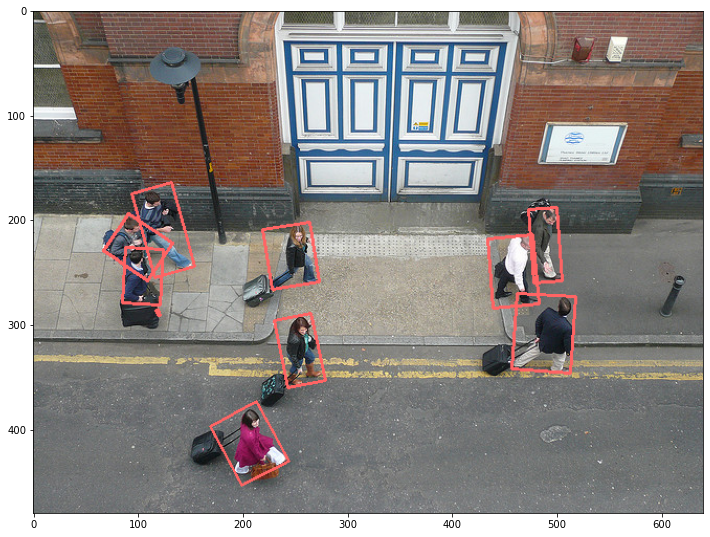

In [35]:
plt.imshow(image)

In [36]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000001011.jpg')

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000001011.txt.coco_theta') as f:
    data = f.readlines()

for corners in data:
    corners = corners.strip().split(',')[1:]
    
    corners = list(map(float, corners))
    
    bbox = rotateRectangle(corners[0], corners[1], corners[2], corners[3], corners[4])
    
    bbox = np.array(bbox)

    bbox = bbox.astype(np.int32)
            
#     image = cv2.putText(image, "{:.2f}".format(corners[4]), text_corner, 
#                         fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.5, color=(0, 255, 0),thickness=1)

    bbox = bbox.reshape(4, 2)

    bbox = bbox.reshape((-1, 1, 2))

    image = cv2.polylines(image, [bbox],
                          True, (255, 100 ,100), 2)

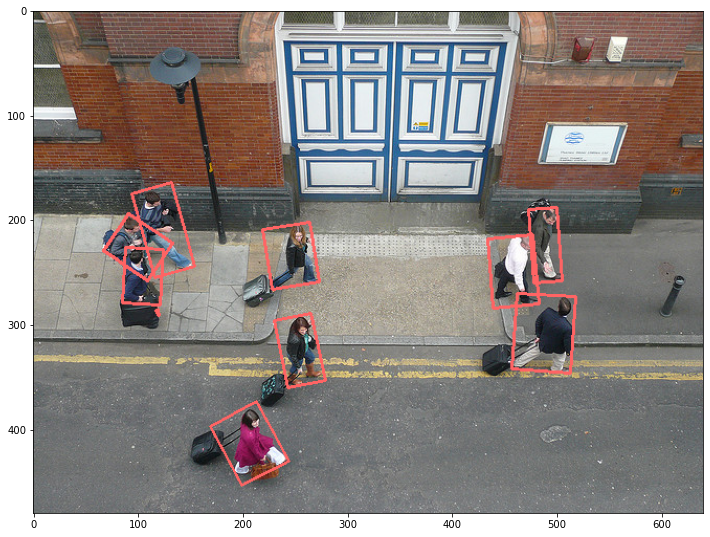

In [37]:
plt.imshow(image)

In [ ]:
print("{:.2f}".format(angle))

In [ ]:
1.4749373000471104 * 180 / np.pi

In [ ]:
x = np.linspace(-100, 100, 100000)

In [ ]:
plt.plot(x, np.arctan(x) * 180 / np.pi)

In [ ]:
np.arctan(-100000) * 180 / np.pi